In [2]:
import pandas as pd
import numpy as np

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from scipy.stats import probplot
import math

In [5]:
df = pd.read_csv("cleaned_data.csv")

In [7]:
df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')

In [9]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268893 entries, 0 to 14268892
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             int64  
 21  TaxiOut            int64  
dtypes: float64(7), int64(11), object(4)
memory usage: 2.3+ GB


In [10]:
#drop columns which are not numerical
q5 = df.drop(['Unnamed: 0','UniqueCarrier','FlightNum','TailNum','Origin','Dest'], axis='columns') #0 9 10 11 17 18

In [11]:
q5.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,2006,1,11,3,743.0,745,1024.0,1018,281.0,273.0,223.0,6.0,-2.0,1587,45,13
1,2006,1,11,3,1053.0,1053,1313.0,1318,260.0,265.0,214.0,-5.0,0.0,1587,27,19
2,2006,1,11,3,1915.0,1915,2110.0,2133,235.0,258.0,220.0,-23.0,0.0,1587,4,11
3,2006,1,11,3,1753.0,1755,1925.0,1933,152.0,158.0,126.0,-8.0,-2.0,872,16,10
4,2006,1,11,3,824.0,832,1015.0,1015,171.0,163.0,132.0,0.0,-8.0,872,27,12


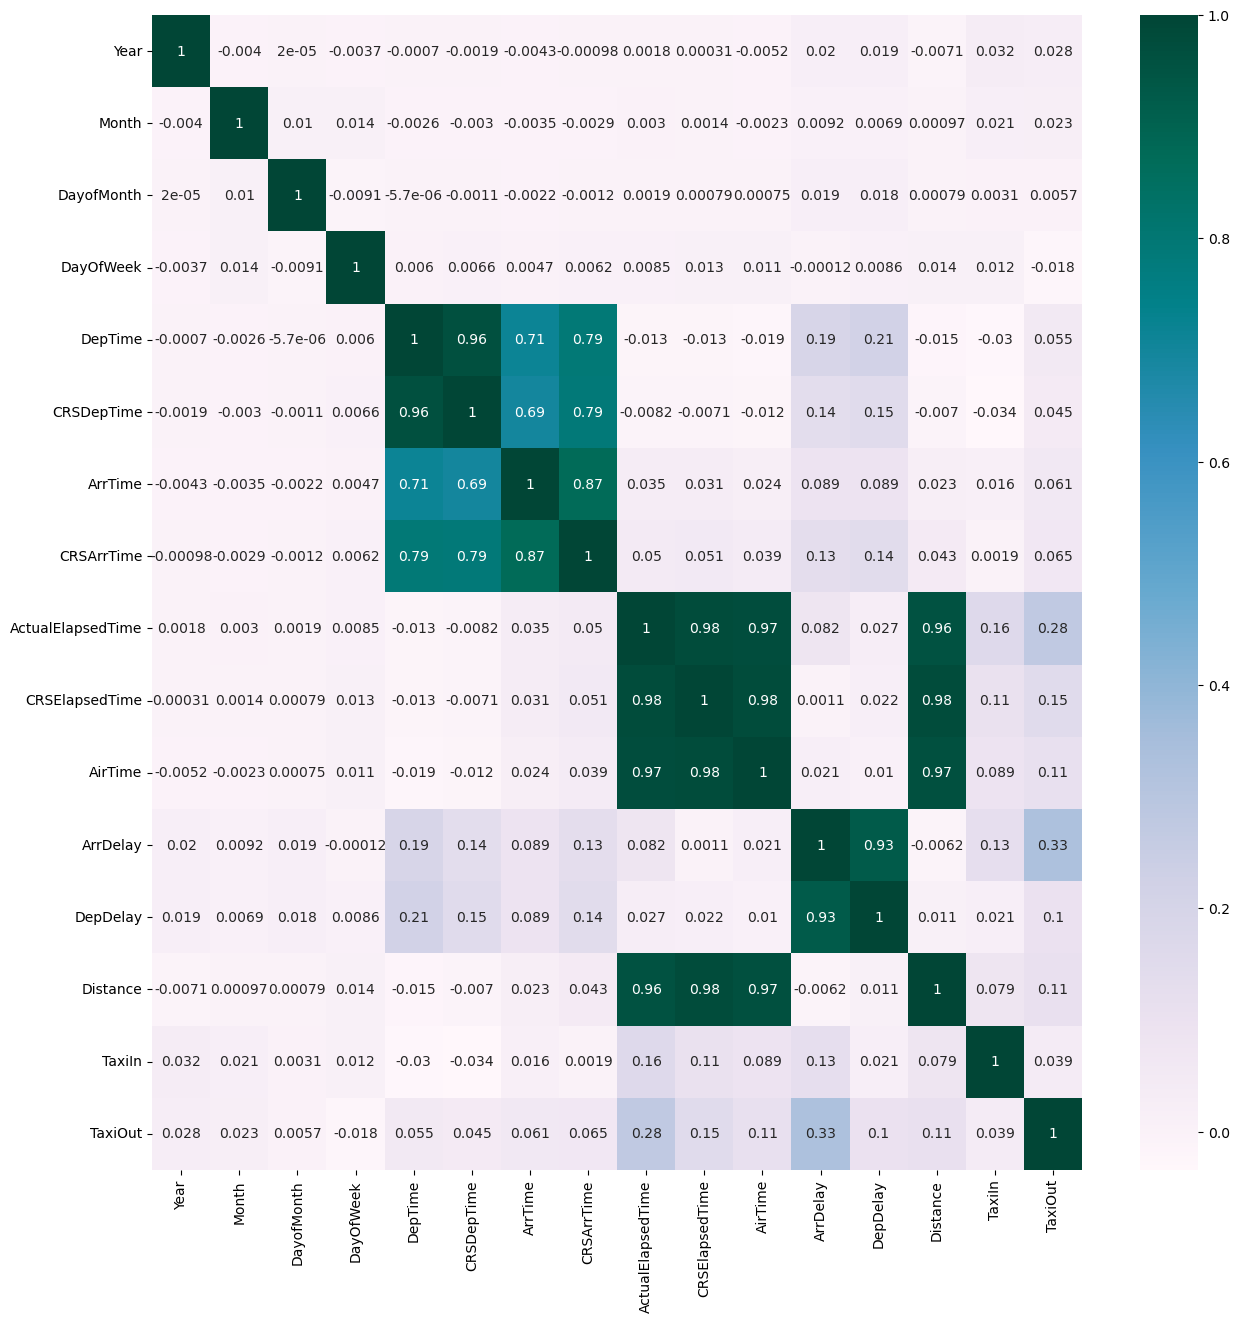

In [16]:
#creating a heatmap to check for correlation
plt.figure(figsize=(15,15))
correlation = q5.corr()
sns.heatmap(correlation,cmap='PuBuGn',annot=True)
plt.savefig("C:/Users/ACER/Programming 2nd semester/Coursework/Pictures/HeatplotQ5.png",bbox_inches='tight')

In [17]:
q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268893 entries, 0 to 14268892
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             int64  
 15  TaxiOut            int64  
dtypes: float64(7), int64(9)
memory usage: 1.7 GB


In [18]:
#set target variable and select feauture columns
x =  q5.iloc[:,[1,3,4,5,7,12,14,15]] #feature columns
y = q5['ArrDelay'] #target variable

In [19]:
x.head()

,Month,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,DepDelay,TaxiIn,TaxiOut
0,1,3,743.0,745,1018,-2.0,45,13
1,1,3,1053.0,1053,1318,0.0,27,19
2,1,3,1915.0,1915,2133,0.0,4,11
3,1,3,1753.0,1755,1933,-2.0,16,10
4,1,3,824.0,832,1015,-8.0,27,12


In [20]:
x.shape

(14268893, 8)

In [26]:
#Training , Testing and Splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(10701669, 8)
(3567224, 8)
(10701669,)
(3567224,)


In [28]:
#scale the columns 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
#developing the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [30]:
linreg.coef_

array([-0.16621965, -0.17154636,  0.6816744 , -0.25182126, -0.85824297,
       34.17437376,  3.73978577,  8.96028042])

In [31]:
y_pred

array([ 18.12314772,  -6.87586602,  -0.90657752, ..., -12.32914694,
         6.06177761, -10.53902385])

In [32]:
accuracy = linreg.score(x_test, y_test)
accuracy

0.9231213919392791

In [33]:
#evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

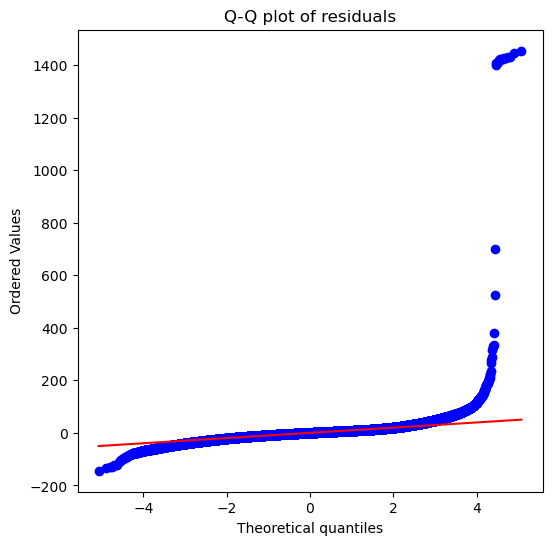

<Figure size 640x480 with 0 Axes>

In [53]:
#analysing the residual terms
residuals = y_test - y_pred
_, ax = plt.subplots(figsize=(6, 6))
probplot(residuals, plot=ax, fit=True)
plt.title('Q-Q plot of residuals')
plt.show()
plt.savefig("C:/Users/ACER/Programming 2nd semester/Coursework/Pictures/QQplotQ5.png",bbox_inches='tight')

In [52]:
print('The mean square error is {:.2f} and root mean square error is {:.2f}'.format(mse, mse**0.5))
print('The r^2 value is {:.2f}'.format(r2))
print('The mean absolute error is {:.2f}'.format(mae))

The mean square error is 110.37 and root mean square error is 10.51
The r^2 value is 0.92
The mean absolute error is 7.34
